In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

# Plib imports
import Plib.Signals.Filters as flt


## Content:


    1.1. Filters (moving average, savitzky-Golay, Triangle, lowess, 
         kernel regression, rolling, cubic spline)
    1.2. Exponential smoothing
    1.3  Analysis of Level Series (stocks, commodities, etc.)
         1.3.1  Normality and Seasonality
         1.3.2  Trend and Seasonality
         1.3.3  Stationarity
    1.4. Arima & Sarima GridSearch ARIMA and ARIMA+GARCH
         1.4.1  GridSearch ARIMA and ARIMA+GARCH
    1.5. Markov Switching Autoregressive Model
         1.5.1  Plotting Matrix and Network of a Markov Net
         1.5.2  Fit model and Diagnose Issues
         1.5.3  Emissions
    1.6  Analysis of Macro Series (Trend and Stationarity)
    

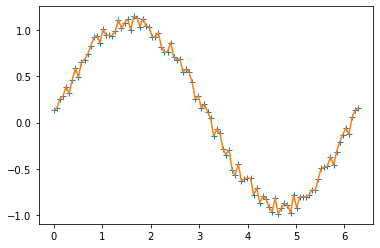

In [17]:
N=100
x = np.linspace(0,2*np.pi,N)
y = np.sin(x) + np.random.random(N) * 0.2
plt.plot(x, y, '+')
plt.plot(x,y)
plt.show()


### 1.1 Filters

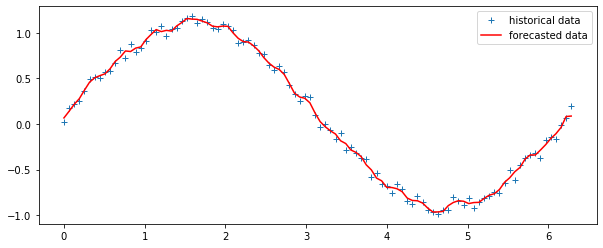

In [4]:
yhat = flt.movingaverage(y,3) # window size 51, polynomial order 3
flt.plotSmoother(x,y,yhat)

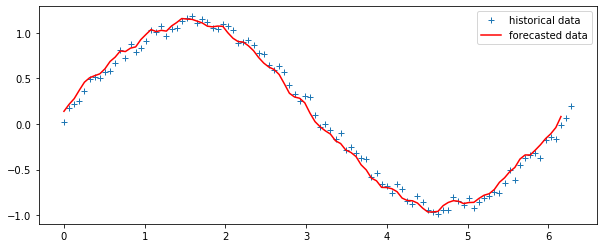

In [5]:
yhat = flt.movingaverage2(y,3) # window size 51, polynomial order 3
flt.plotSmoother(x,y,yhat)

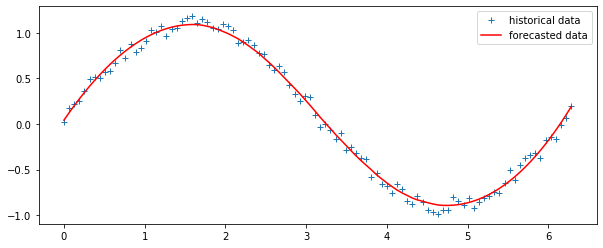

In [6]:
yhat = flt.savitzkyGolay(y)
flt.plotSmoother(x,y,yhat)

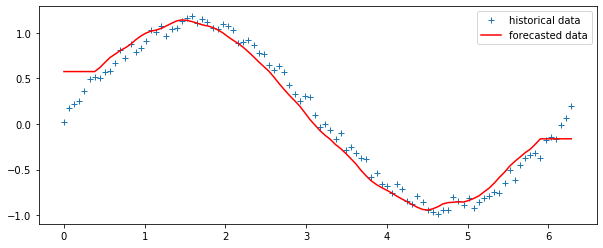

In [7]:
yhat=flt.smoothTriangle(y,4)
flt.plotSmoother(x,y,yhat)

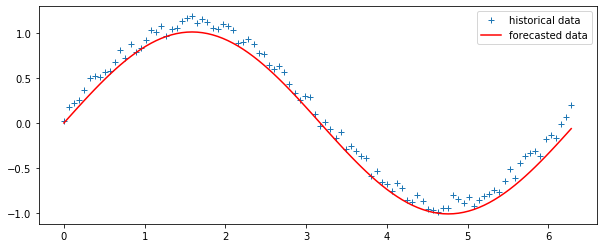

In [8]:
yhat=flt.fft(x,y)
flt.plotSmoother(x,y,yhat)

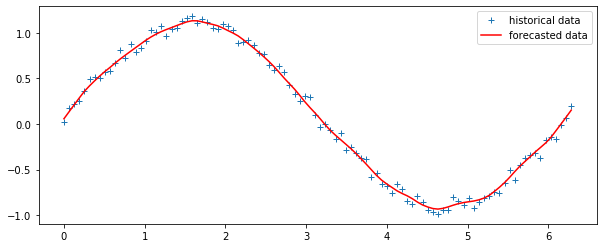

In [9]:
x_,yhat = flt.lowess(x,y)
flt.plotSmoother(x,y,yhat)

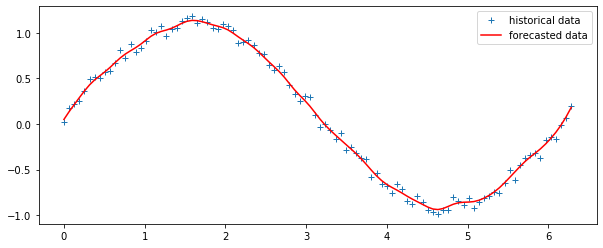

In [10]:
yhat, y_std = flt.kernelReg(x,y)
flt.plotSmoother(x,y,yhat)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


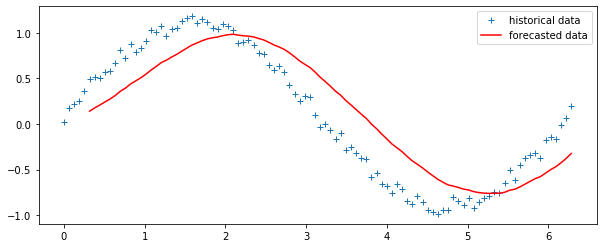

In [11]:
yhat=flt.rollFilter(y,rtype='exp')
flt.plotSmoother(x,y,yhat)

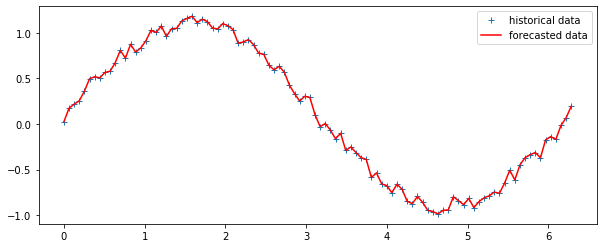

In [12]:
yhat=flt.cubicSpline(x,y)
flt.plotSmoother(x,y,yhat)


### 1.2 Exponential smoothing:

Single Exponential Smoothing, or SES, for univariate data without trend or seasonality.
Double Exponential Smoothing for univariate data with support for trends.
Triple Exponential Smoothing, or Holt-Winters Exponential Smoothing, with support for both trends and seasonality.

Total Iterations to be Computed:  54



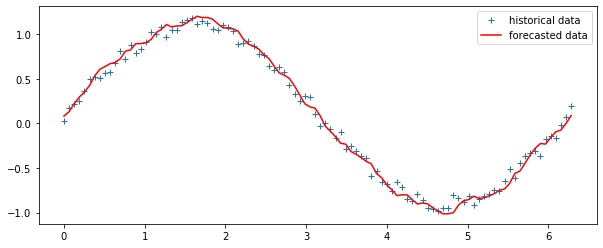

Parameters:  ['trend', 'damped_trend', 'seasonal', 'seasonal_periods', 'remove_bias']


Parameters      RMSE         AIC         BIC
0  ('add', False, None, 5, False)  0.089801 -516.042421 -505.682246
1   ('add', None, None, 5, False)  0.089801 -516.042421 -505.682246
2   ('add', False, None, 5, True)  0.091114 -516.042421 -505.682246

In [13]:
model,yhat,scores=flt.holt_winters(x,y,parallel=True)
flt.plotSmoother(x,y,yhat)
print('Parameters: ', scores.getPDesc())
scores.getAll().head(3)


### 1.3 Analysis of Level Series (Stock, Commodities, ETFs, etc.)

A standard assumption in finance models is that returns are normally distributed. Numerous studies have however shown empirically that this is not quite true. Specifically,

Left skewed : Gains and loss distributions are not symmetrical. We see longer left tails compared to the right tails. The large negative returns are higher in magnitude compared to the large positive returns. The mean is less than the median. Seen in negatively skewed distributions. Confirmed by the coefficient of skewness (which is negative).

Excess kurtosis : The distribution is fat at the tails and higher than normal peaks. Excess kurtosis seen (anything above 0 is deemed as excess kurtosis. Normal distribution has a kurtosis of 0 when measured using the pandas kurtosis method).

There is a visible difference in the shape of the returns histogram and the Gaussian (normal) distribution curve. The peak is higher in the histogram than the normal curve. The left tail of the distribution is longer.

Q-Q plots are used to compare empirical data to theoretical distributions. They are helpful in finding deviations at the tails. If we find that the dots are more or less on the red line, then it means that the data (in this case returns) is normally distributed. There is drift at both ends of the tails. This means that we have fatter tails violating the normality assumption. The size of the drift is higher on the left side of the plot than on the right side. This means that we observe large drops in returns but not equally large growths in returns.

#### 1.3.1 Normality and Seasonality

------------------------ Summary Statistics for Crude Oil Log Returns ------------------------
Range of dates: 2016-01-01 to 2020-07-03
Number of observations: 1646
Mean: 0.0002
Median: 0.0000
Min: -0.3312
Max: 0.2287
Standard Deviation: 0.0254
Skewness: -1.7073
Kurtosis: 48.7715
Jarque-Bera statistic: 162921.39 with p-value: 0.00


BY WEEK mean Date 
 
 Friday 
 0.001100 
 
 
 Monday 
 0.000000 
 
 
 Saturday 
 -0.001000 
 
 
 Sunday 
 0.000000 
 
 
 Thursday 
 0.003500 
 
 
 Tuesday 
 -0.000600 
 
 
 Wednesday 
 -0.001800 
 
            BY MONTH mean Date 
 
 April 
 0.000600 
 
 
 August 
 0.000200 
 
 
 December 
 0.001600 
 
 
 February 
 -0.000500 
 
 
 January 
 -0.000300 
 
 
 July 
 0.000100 
 
 
 June 
 0.000800 
 
 
 March 
 -0.004400 
 
 
 May 
 0.004000 
 
 
 November 
 -0.001700 
 
 
 October 
 0.000000 
 
 
 September 
 0.001900 
 
            BY QUARTER mean Date 
 
 December 
 0.000000 
 
 
 June 
 0.001800 
 
 
 March 
 -0.001700 
 
 
 September 
 0.008100 
 
            BY SEMESTER mean Date 
 
 December 
 0.000700 
 
 
 June 
 0.012500

----------------------------------------------------------------------------------------------


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


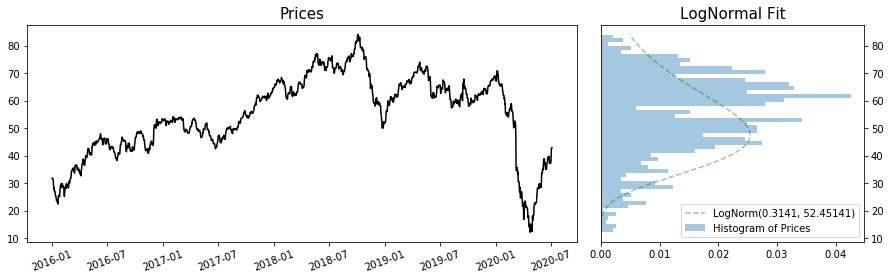

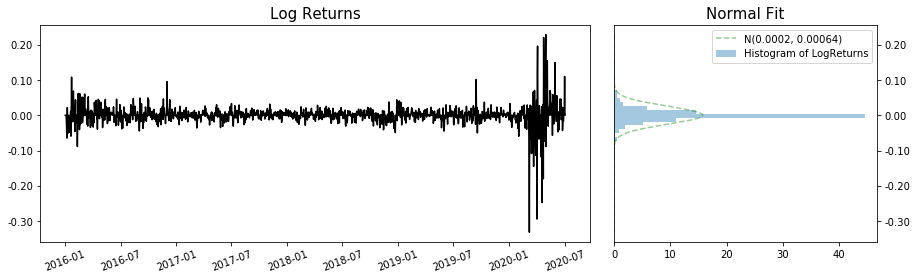

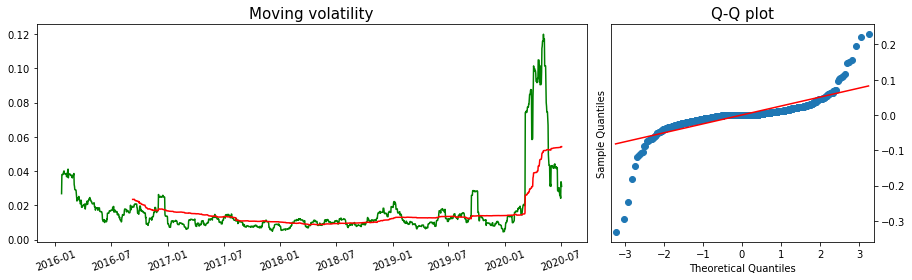

In [14]:
df = pd.read_csv("crude_oil_prices.csv", index_col=0, parse_dates=True)
df.columns=['Adj Close']
df.index=pd.to_datetime(df.index)
df=df.asfreq(freq='d', method='bfill')
df=df['2016':]
rt=flt.normTest(df,title='Crude Oil', lblclose='Adj Close')


In [15]:
rt[1]

count    mean     std     min     25%  50%     75%     max
Date                                                                 
April      150.0  0.0006  0.0531 -0.2940 -0.0032  0.0  0.0079  0.2287
August     124.0  0.0002  0.0127 -0.0335 -0.0034  0.0  0.0052  0.0476
December   124.0  0.0016  0.0151 -0.0493 -0.0014  0.0  0.0066  0.0953
February   142.0 -0.0005  0.0196 -0.0885 -0.0080  0.0  0.0072  0.0616
January    155.0 -0.0003  0.0194 -0.0647 -0.0054  0.0  0.0052  0.1080
July       127.0  0.0001  0.0162 -0.0385 -0.0057  0.0  0.0050  0.1099
June       150.0  0.0008  0.0165 -0.0471 -0.0043  0.0  0.0061  0.0555
March      155.0 -0.0044  0.0375 -0.3312 -0.0059  0.0  0.0060  0.0707
May        155.0  0.0040  0.0269 -0.0886 -0.0039  0.0  0.0086  0.1546
November   120.0 -0.0017  0.0137 -0.0411 -0.0059  0.0  0.0031  0.0464
October    124.0  0.0000  0.0108 -0.0302 -0.0044  0.0  0.0047  0.0443
September  120.0  0.0019  0.0169 -0.0500 -0.0023  0.0  0.0076  0.1015

### 1.3.2 Trend and Seasonality

Date
2016-01-01    31.752140
2016-01-02    31.803179
2016-01-03    31.854186
2016-01-04    31.905159
2016-01-05    31.956100
Freq: D, Name: trend, dtype: float64

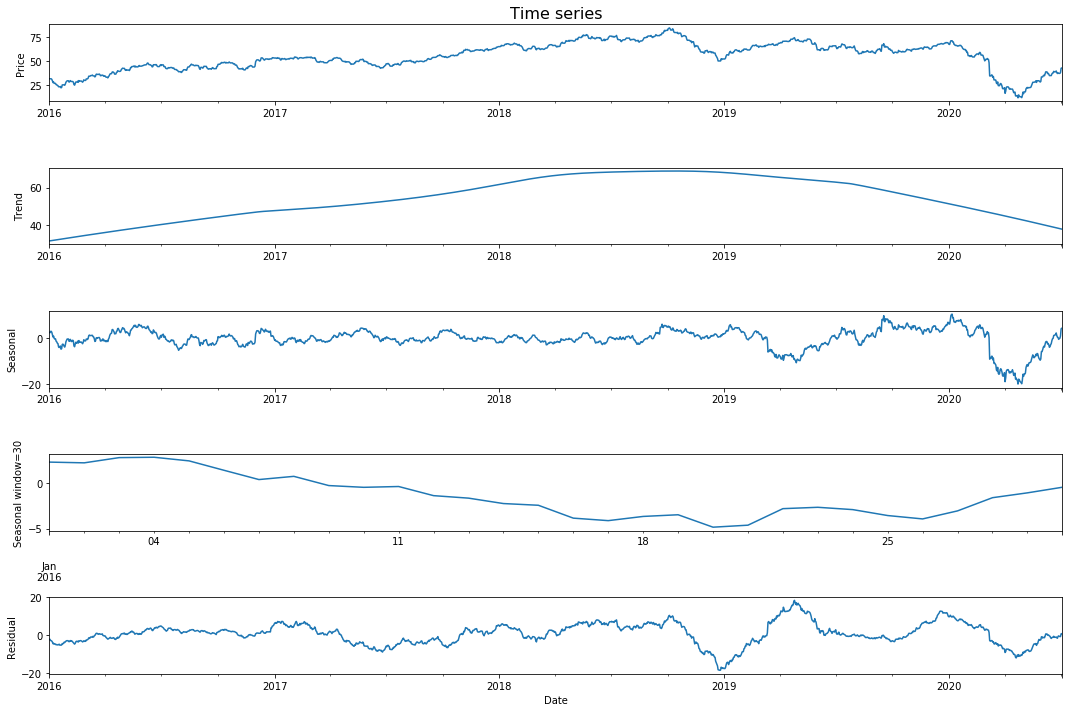

In [16]:
decomp=flt.STLSeriesDecomp(df,'Adj Close',plot=True)
decomp['STL_trend'].head(5)

### 1.3.3 Stationarity

p is the number corrisponding to the lag crossing the confidence interval (shadow area) for the first time in the PACF chart. 
q is the the number corrisponding to the lag crossing the confidence interval (shadow area) for the first time in the ACF chart. 


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


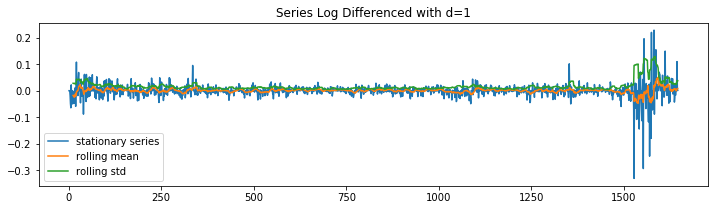

ACF First Lag AR(q):  1


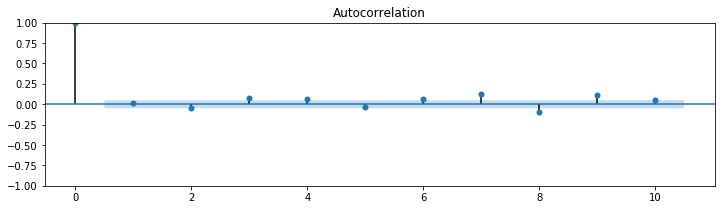

PACF First Lag MA(p):  1


/Users/rob/.local/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


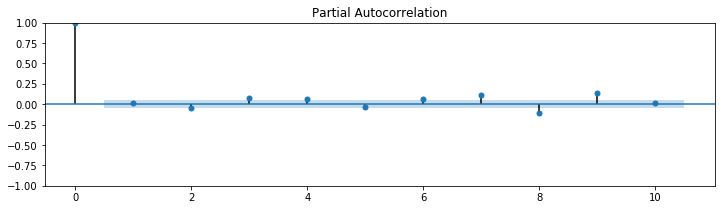

-------------------- Unit Root Tests -----------------------------
Results of Dickey-Fuller Test:
Test Statistic                -6.340482e+00
p-value                        2.762600e-08
#Lags Used                     2.400000e+01
Number of Observations Used    1.620000e+03
Critical Value (1%)           -3.434393e+00
Critical Value (5%)           -2.863326e+00
Critical Value (10%)          -2.567721e+00
dtype: float64
The series is stationary

Results of KPSS Test:
Test Statistic           0.185426
p-value                  0.100000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
The series is stationary
------------------------------------------------------------------


/Users/rob/.local/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [17]:
#Differencing
diff_series,p,q=flt.seriesDifferencing(df,lbl='Adj Close',diff=1,cin=0.05)
#Demeaning
#diff_series,p,q=flt.seriesDifferencing(df,lbl='Adj Close',diff=-15,cin=0.05)
#Exp Demeaning
#diff_series,p,q=flt.seriesDifferencing(df,exp=True,lbl='Adj Close',diff=-15,cin=0.05)


If the ADF test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary). 

If the KPSS test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary). 

Alternatively, we can use the p-value to make the inference. If p-value is less than 0.05, we can reject the null hypothesis. And say that the series is not stationary.

## 1.4 Arima & Sarima
ARIMA/SARIMA models can be used for measuring trends that have occasional interruptions; it should have a clear trend but the volatility is relatively constant throughout. 

In [18]:
arima=flt.arima_test(df,y1='2018',y2='2019',params=(3,1,2,'n'))


The RMSE value for ARIMA is 16.176719779739425
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1096
Model:                 ARIMA(3, 1, 2)   Log Likelihood                3036.713
Date:                Tue, 09 Aug 2022   AIC                          -6061.426
Time:                        15:11:21   BIC                          -6031.435
Sample:                    01-01-2016   HQIC                         -6050.078
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7951      0.389      2.045      0.041       0.033       1.557
ar.L2         -0.0043      0.505     -0.008      0.993      -0.993       0.985
ar.L3

/Users/rob/Desktop/PythonCode/Plib/Signals/Filters.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else:
/Users/rob/Desktop/PythonCode/Plib/Signals/Filters.py:1049: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model = model.fit()


To check for normality in residuals: The Jarque-Bera test
The null hypothesis is that the time series is normally distributed. We use it in addition to visual interpretation of plots like the residual distribution and the Q-Q plots. A tiny p-value and a large chi-square value from this test means that you can reject the null hypothesis that the data is normally distributed

To check for autocorrelations in residuals: The Ljung-Box test
The null hypothesis is that the serial correlations of the time series are zero. We use it in addition to visual interpretation of ACF/PACF plots. The null hypothesis of the Box Ljung Test, H0, is that resideuals are independent. When the Ljung Box test is applied to the residuals of an ARIMA model, the degrees of freedom h must be equal to m-p-q, where p and q are the number of parameters in the ARIMA(p,q) model.


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/rob/opt/intelpytho

Jarque-Bera statistic: 50213798.88 with p-value: 0.00
Residuals are likely not normally distributed.
Ljung-Box statistic at 3 lags: 0.03 with p-value: 1.00
Residuals are likely to be independent.
Breusch–Godfrey statistic: 0.00 with p-value: 1.00 and f-value: 0.00
Our residuals are not likely to be autocorrelated.


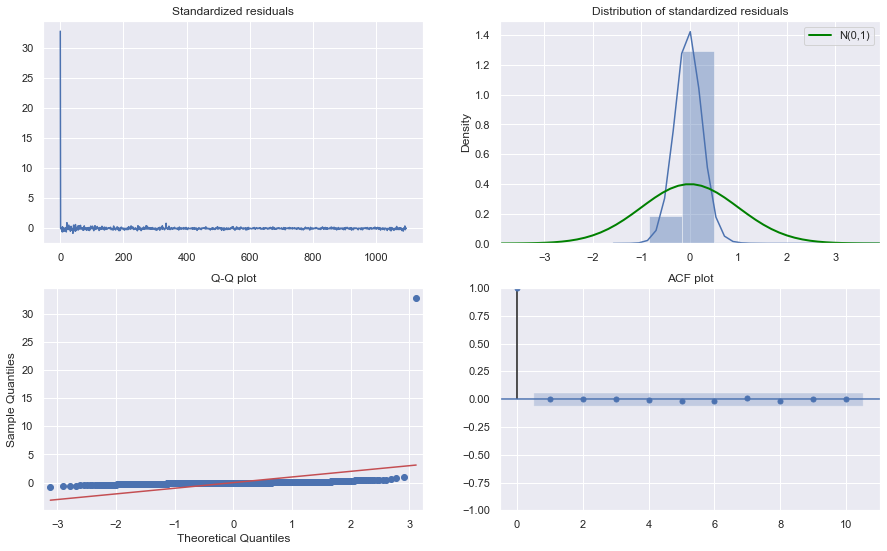

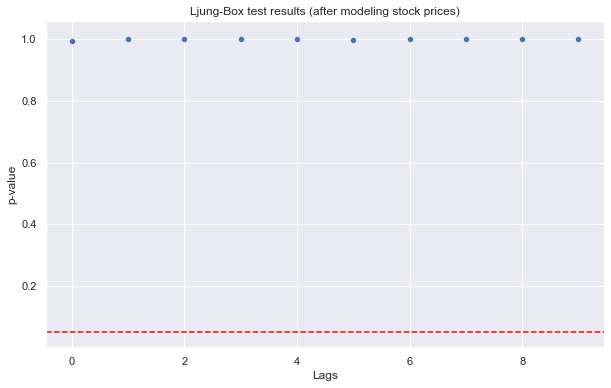

In [19]:
flt.residuals_diagnostics(arima,lags=3)

In [20]:
sarima=flt.sarima_test(df,y1='2018',y2='2019',params=(3,1,2,'n',0,1,1,4))


The RMSE value for SARIMA is 18.252677739870897
                                      SARIMAX Results                                      
Dep. Variable:                           Adj Close   No. Observations:                 1096
Model:             SARIMAX(3, 1, 2)x(0, 1, [1], 4)   Log Likelihood                3012.749
Date:                             Tue, 09 Aug 2022   AIC                          -6011.497
Time:                                     15:11:25   BIC                          -5976.533
Sample:                                 01-01-2016   HQIC                         -5998.265
                                      - 12-31-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1637      0.638      0.257      0.798    

/Users/rob/Desktop/PythonCode/Plib/Signals/Filters.py:1075: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model = sarimax.SARIMAX(np.log(train_data[lbl]), seasonal_order=(P,D,Q,m), order=(p,i,q),trend=t)
/Users/rob/Desktop/PythonCode/Plib/Signals/Filters.py:1077: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model = sarimax.SARIMAX(train_data[lbl], seasonal_order=(P,D,Q,m), order=(p,i,q),trend=t)


#### 1.4.1 GridSearch ARIMA and ARIMA+GARCH

An ARCH model is very similar to ARIMA, but its CH component models the non-constant error variance (Heteroskedicity) as time dependent. An ARCH Model becomes appropriate when there are clear changes in volatility regimes or different “volatility clusters.”

In [21]:
#This is the forecast window for trading
outlook=7
uptoday_data = df[:len(df)-outlook]
future_data = df[len(df)-outlook+1:]
x = np.linspace(0,2*len(uptoday_data),len(uptoday_data))
y = uptoday_data['Adj Close'].values


#### Two steps: first GridSearch ARIMA then fit GARCH

Total Iterations to be Computed:  2



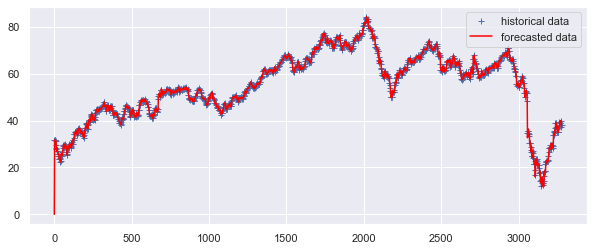

Parameters:  ['p', 'q', 'i', 'trend', 'log']


Parameters      RMSE          AIC          BIC
0  (3, 1, 1, 'n', False)  0.772267  4266.735914  4293.737489
1   (3, 1, 1, 'n', True)  0.808856 -7398.294951 -7371.293375

In [22]:
arima,yhat,scores=flt.arimaGS(x,y,parallel=False)
flt.plotSmoother(x,y,yhat)
p_,q_,i_,t_,l_=scores.getModelParams(0)
print('Parameters: ', scores.getPDesc())
scores.getAll().head(3)


/Users/rob/Desktop/PythonCode/Plib/Signals/Filters.py:1227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['arima']=df.Prediction
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/rob/opt/intel

Iteration:      5,   Func. Count:     52,   Neg. LLF: 2023.2551422609847
Iteration:     10,   Func. Count:     96,   Neg. LLF: 1969.5628730722747
Iteration:     15,   Func. Count:    138,   Neg. LLF: 1968.6704452108286
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1968.6704452108286
            Iterations: 16
            Function evaluations: 145
            Gradient evaluations: 16
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1968.67
Distribution:                  Normal   AIC:                           3951.34
Method:            Maximum Likelihood   BIC:                           3989.15
                                        No. Observations:                 1639
Date:            

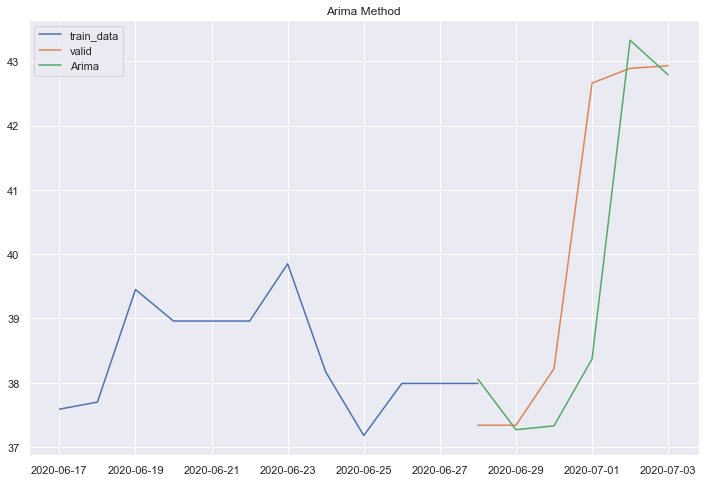

/Users/rob/Desktop/PythonCode/Plib/Signals/Filters.py:1260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['arima+garch']=df.Prediction+predicted_et


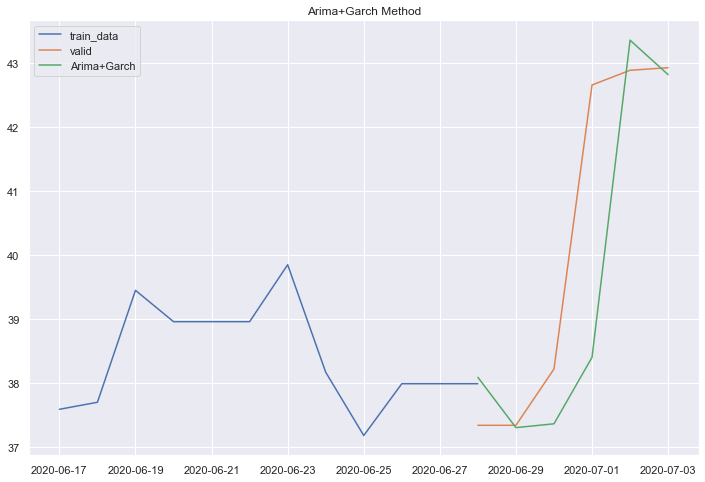

In [32]:
garch=flt.arima_garch_test(arima,uptoday_data,future_data,scores)


#### One step: fit ARIMA with GARCH

Total Iterations to be Computed:  2



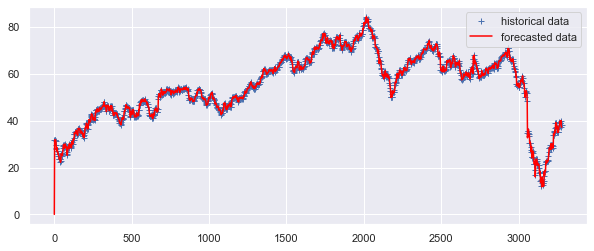

Parameters:  ['p', 'q', 'i', 'trend', 'log']


Parameters      RMSE          AIC          BIC
0  (3, 1, 1, 'n', False)  0.769253  4266.735914  4293.737489
1   (3, 1, 1, 'n', True)  1.134375 -7398.294951 -7371.293375

In [33]:

arima,garch,yhat,scores=flt.arima_garchGS(x,y,parallel=False)
flt.plotSmoother(x,y,yhat)
p_,q_,i_,t_,l_=scores.getModelParams(0)
print('Parameters: ', scores.getPDesc())
scores.getAll().head(3)



# 1.5 Markov Switching Autoregressive Model
Markov switching model is suitable for describing correlated data that exhibit distinct dynamic patterns during different time periods.It is a nonlinear time-series models which involves multiple equations and can characterize the time-series behaviors in different regimes. By permitting switching between these equations, the model is able to capture more complex dynamic patterns. The Markov regression model  is a dynamic linear regression where the coefficients and the variance of the error term can switch across regimes. Markov switching model is constructed by combining two or more dynamic models via a Markovian switching mechanism. In addition to the Markov switching model of conditional mean, Markov switching mechanism into conditional variance models (GARCH Model with Markov switching) can also be added. However, one  drawback of state-rich Markov chain models is that the transition matrix in its full form takes up a lot of memory. 

To justify whether the Markov switching model is appropriate two hypothesis should be refused:
1) the switching parameters (intercepts) are all the same;
2) the state variables are independent.
Rejecting the first suggests that switching does occur whereas failure to reject the second support the absence of a Markovian structure in the data; however, rejection of the second hypothesis is a weak indicator to support the use of MSM. For further confirmation, we should test the significance of model parameters as well as some linear (nonlinear) hypotheses of these parameters. A famous application is prediction of the S&P500 with GDP and Central Bank Money supply.

#### Acquire data and shape forecasting information

In [48]:
import Plib.DataFarm.FRData as av
symbol='GDX'
dt_start='1970-10-01'
dt_end='2020-10-30'
#3638 rows x 6 columns
df2=av.getData('etf',symbol,d1= dt_start, d2=dt_end,freq='D')

#Manipulate data
data=df2.copy()
data['returns']=data.Adjusted_close.pct_change()
data.columns=['Open','High','Low','Close','Adj Close','Volume','returns']
data['volumeGap'] = np.log(data['Volume'] / data['Volume'].shift())
data['dailyChange'] = (data['Adj Close'] - data['Open']) / data['Open']
data['fractHigh'] = (data['High'] - data['Open']) / data['Open']
data['fractLow'] = (data['Open'] - data['Low']) / data['Open']
data['forecastVariable'] = data['Adj Close'].shift(-1) - data['Adj Close']
data.dropna(inplace=True)
data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/tables/array.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (oid, self.atom, self.shape, self._v_chunkshape) = self._open_array()


In [49]:
#Define variable to be predicted
endog = data['returns'][-2500:]
#Define variables to predict
exog = data [['volumeGap', 'dailyChange', 'fractHigh', 'fractLow']][-2500:]

#Define Up/Down/Nochange states
data['state'] = data['returns'].apply(lambda x: 'up' if (x > 0.001)\
else ('down' if (x < -0.001)\
else 'no_change'))
data['prev_state'] = data['state'].shift(1)

data.tail()


Open   High      Low  Close  Adj Close  \
Date                                                                 
2020-10-22 00:00:00-04:00  39.66  39.68  38.5900  39.19      39.19   
2020-10-23 00:00:00-04:00  39.30  39.39  38.4650  38.82      38.82   
2020-10-26 00:00:00-04:00  38.44  39.16  38.1700  38.21      38.21   
2020-10-27 00:00:00-04:00  38.23  38.86  38.0877  38.83      38.83   
2020-10-28 00:00:00-04:00  38.41  38.41  36.3400  36.52      36.52   

                               Volume   returns  volumeGap  dailyChange  \
Date                                                                      
2020-10-22 00:00:00-04:00  18843606.0 -0.018287   0.090289    -0.011851   
2020-10-23 00:00:00-04:00  13620381.0 -0.009441  -0.324606    -0.012214   
2020-10-26 00:00:00-04:00  16861767.0 -0.015714   0.213481    -0.005983   
2020-10-27 00:00:00-04:00  13935417.0  0.016226  -0.190615     0.015694   
2020-10-28 00:00:00-04:00  37282323.0 -0.059490   0.984086    -0.049206   

                           fractHigh  fractLow  forecastVariable state  \
Date                                                                     
2020-10-22 00:00:00-04:00   0.000504  0.026979             -0.37  down   
2020-10-23 00:00:00-04:00   0.002290  0.021247             -0.61  down   
2020-10-26 00:00:00-04:00   0.018730  0.007024              0.62  down   
2020-10-27 00:00:00-04:00   0.016479  0.003722             -2.31    up   
2020-10-28 00:00:00-04:00   0.000000  0.053892              0.43  down   

                          prev_state  
Date                                  
2020-10-22 00:00:00-04:00         up  
2020-10-23 00:00:00-04:00       down  
2020-10-26 00:00:00-04:00       down  
2020-10-27 00:00:00-04:00       down  
2020-10-28 00:00:00-04:00         up

#### 1.5.1 Plotting Matrix and Network of a Markov Net

Frequency Tables: 
state       down  no_change   up
prev_state                      
down         782         71  912
no_change     63          9   62
up           920         54  752

state
down         1765
no_change     134
up           1726
dtype: int64

Transition Matrix: 
state           down  no_change        up
prev_state                               
down        0.443059   0.040227  0.516714
no_change   0.470149   0.067164  0.462687
up          0.533024   0.031286  0.435689

prev_state
down         1.0
no_change    1.0
up           1.0
dtype: float64


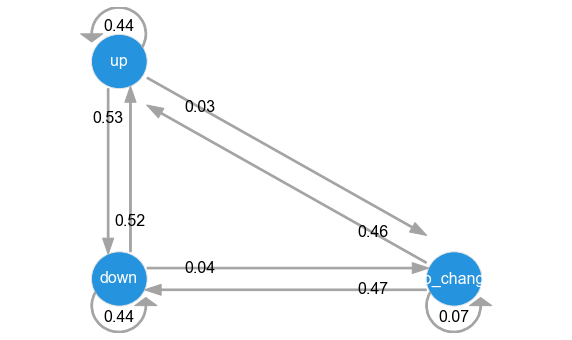

In [50]:
flt.mkn_makeNet(data)

#### 1.5.2 Fit model and Diagnose Issues

/Users/rob/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rob/.local/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                        Markov Switching Model Results                        
Dep. Variable:                returns   No. Observations:                 2500
Model:               MarkovRegression   Log Likelihood                8728.851
Date:                Tue, 09 Aug 2022   AIC                         -17413.703
Time:                        15:14:20   BIC                         -17285.574
Sample:                             0   HQIC                        -17367.186
                               - 2500                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0074      0.003      2.921      0.003       0.002       0.012
x1             0.0057      0.002      2.337      0.0

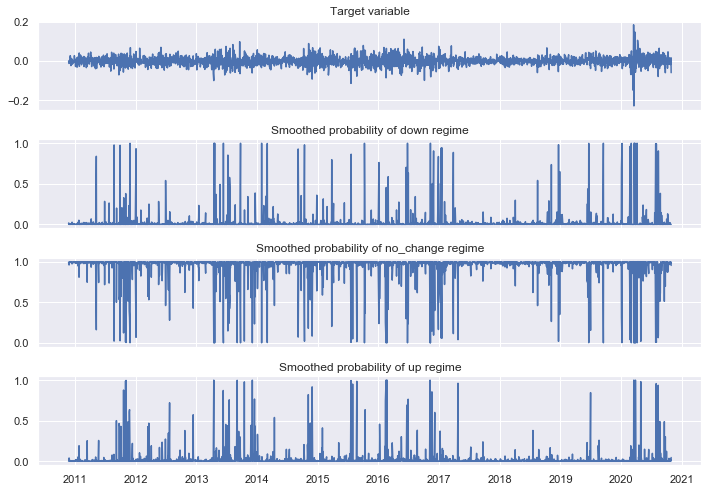

In [51]:
mkn_model=flt.mkn_fitModel(endog,exog)
flt.mkn_diagnostics(endog,mkn_model)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Jarque-Bera statistic: 14.68 with p-value: 0.00
Residuals are likely not normally distributed.
Ljung-Box statistic at 3 lags: 5.13 with p-value: 0.27
Residuals are likely to be independent.
Breusch–Godfrey statistic: 2.85 with p-value: 0.42 and f-value: 0.95
Our residuals are not likely to be autocorrelated.


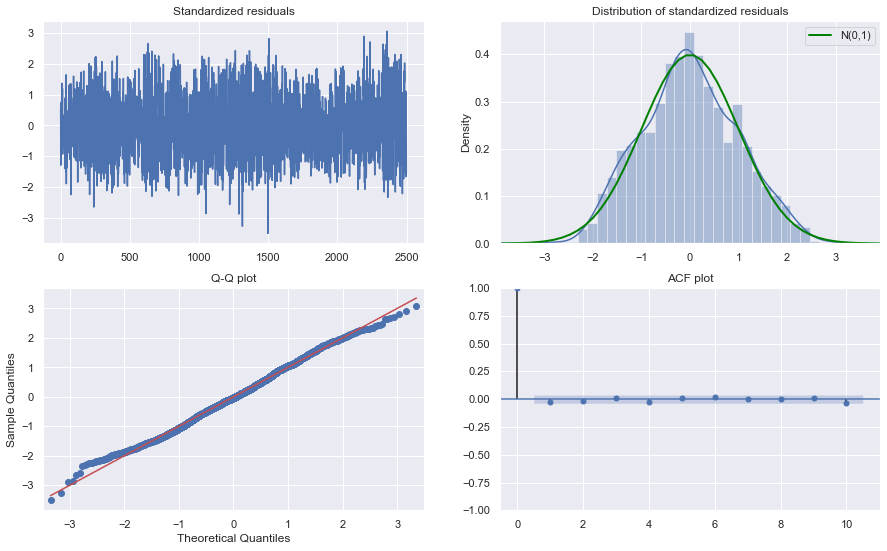

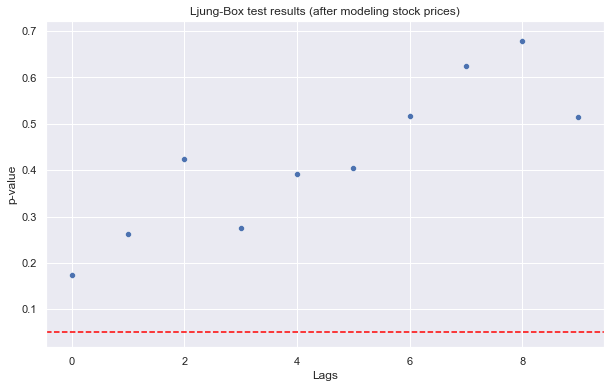

In [52]:
flt.residuals_diagnostics(mkn_model,lags=3)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


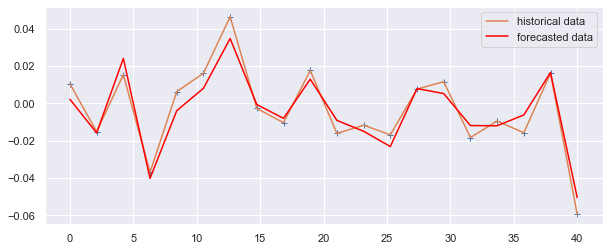

                        Date  Predicted   returns
0  2020-10-01 00:00:00-04:00   0.002197  0.010470
1  2020-10-02 00:00:00-04:00  -0.015805 -0.015163
2  2020-10-05 00:00:00-04:00   0.024080  0.015396
3  2020-10-06 00:00:00-04:00  -0.040171 -0.036897
4  2020-10-07 00:00:00-04:00  -0.003895  0.006298
5  2020-10-08 00:00:00-04:00   0.008087  0.016167
6  2020-10-09 00:00:00-04:00   0.034786  0.046446
7  2020-10-12 00:00:00-04:00  -0.000609 -0.002697
8  2020-10-13 00:00:00-04:00  -0.008010 -0.010327
9  2020-10-14 00:00:00-04:00   0.012984  0.017640
10 2020-10-15 00:00:00-04:00  -0.009106 -0.016113
11 2020-10-16 00:00:00-04:00  -0.014928 -0.011663
12 2020-10-19 00:00:00-04:00  -0.023103 -0.016821
13 2020-10-20 00:00:00-04:00   0.007951  0.007661
14 2020-10-21 00:00:00-04:00   0.005270  0.011657
15 2020-10-22 00:00:00-04:00  -0.011870 -0.018287
16 2020-10-23 00:00:00-04:00  -0.011977 -0.009441
17 2020-10-26 00:00:00-04:00  -0.006177 -0.015714
18 2020-10-27 00:00:00-04:00   0.016564  0.016226


In [53]:
combine=flt.mkn_prediction(mkn_model,endog)


#### 5.1.3 Use states to make emissions

In [54]:
states=flt.mkn_mapStatesEmissions(data.state)


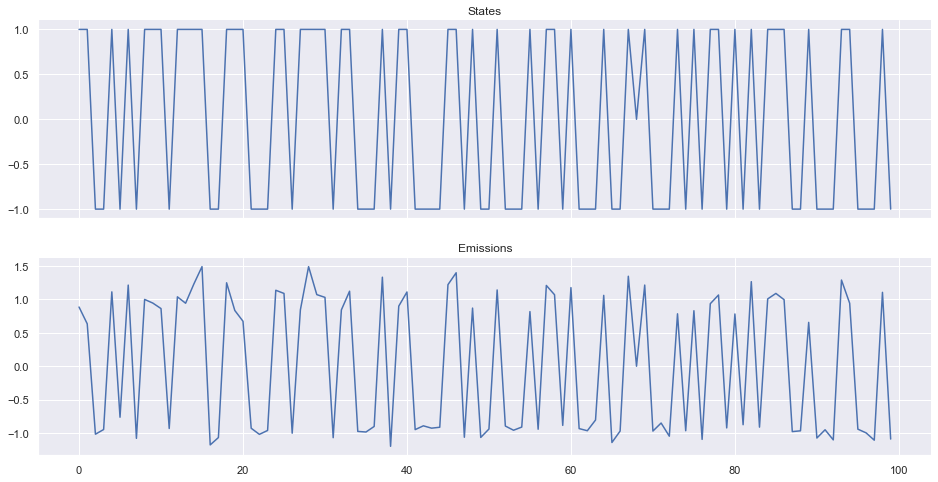

In [55]:
#Specify distributional parameters for each state - note: empty node at the beginning
gaussian_ems = flt.gaussian_emissions(states, mus=[0,1, 0,0.5, -1], sigmas=[0,0.2, 0.5, 0.3,0.1])
flt.plot_emissions(states, gaussian_ems)

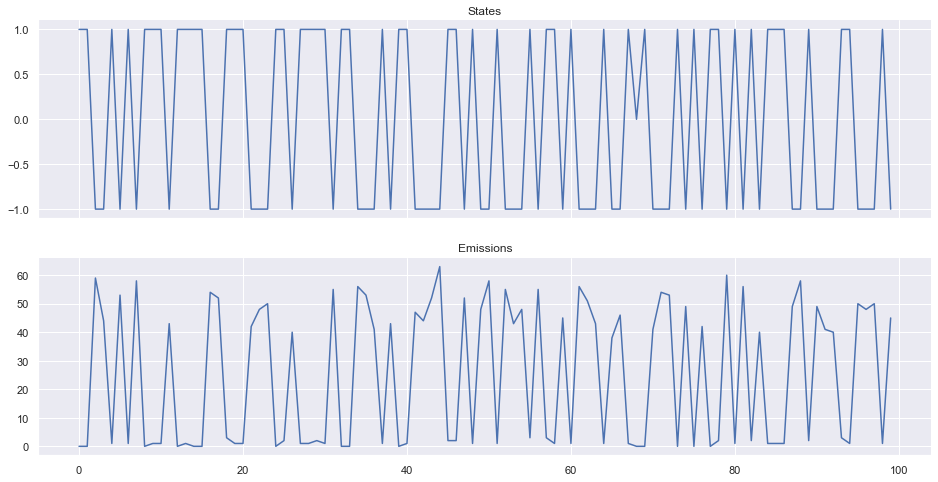

In [56]:
poisson_ems = flt.poisson_emissions(states, lam=[0,1, 10,25, 50])
flt.plot_emissions(states, poisson_ems)

In [57]:
#only positive codifications of states [1,2,3] not [1,-1,0]
#gamma_ems = flt.gamma_emissions(states, lam=[0,1, 10,25, 50])
#flt.plot_emissions(states, gamma_ems)

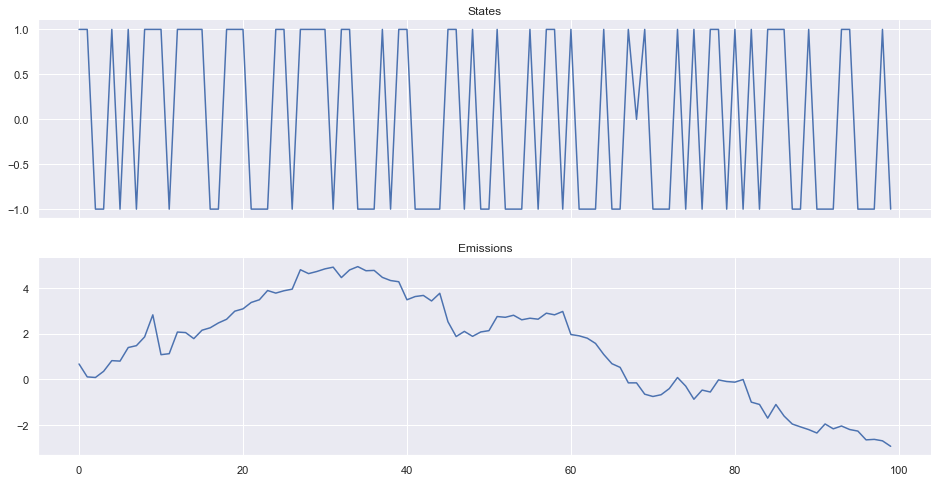

In [58]:
#Autoregressive MM model that the emission value does not only depend on the current state, 
#but also on previous state(s) (for instance the motion of a person).
#Heteroskedastic Autoregressive Emissions have non-constant variance; a simple example has
#the location mu_t of the emission distribution at time t depending on y_{t-1}, 
#and the scale sigma depending only on the current state s_t. Substantially we are imposing
#that noise is the only thing that depends on state, while the location follows a random walk. 
#k is a multiplicative autoregressive coefficient that scales how the previous emission 
#affects the location \mu of the current emission. Also assume the initial location mu=0.
#Note the impact of k.
ar_het_ems = flt.ar_gaussian_heteroskedastic_emissions(states, k=1, sigmas=[0,0.5, 0.1, 0.01,0.2])
flt.plot_emissions(states, ar_het_ems)

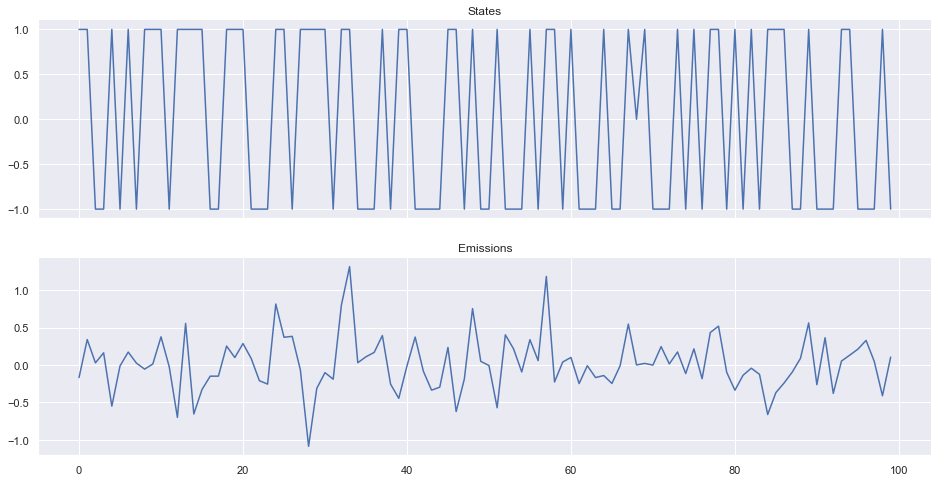

In [59]:
ar_het_ems = flt.ar_gaussian_heteroskedastic_emissions(states, k=0, sigmas=[0,0.5, 0.1, 0.01,0.2])
flt.plot_emissions(states, ar_het_ems)

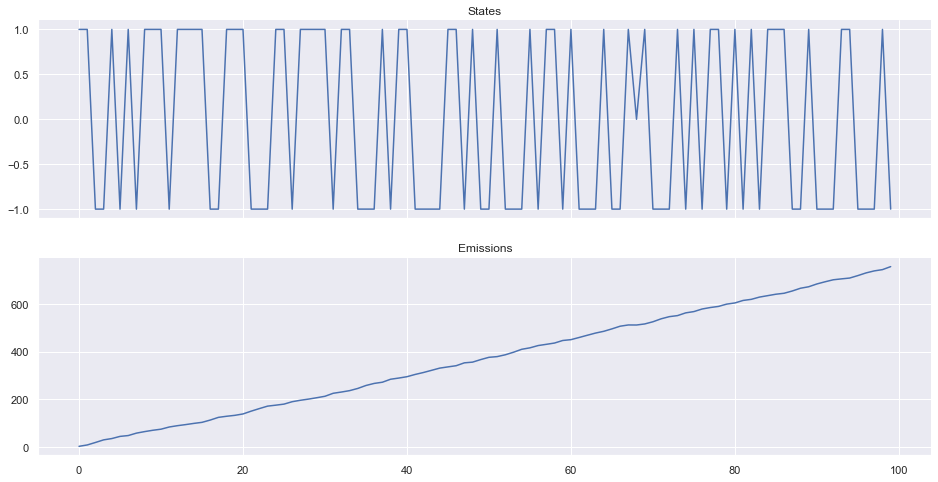

In [60]:
#Homoskedastic Autoregressive Emissions have constant variance
ar_hom_ems = flt.ar_gaussian_homoskedastic_emissions(states, k=1, mus=[0,5,-10, 0, 10])
flt.plot_emissions(states, ar_hom_ems)

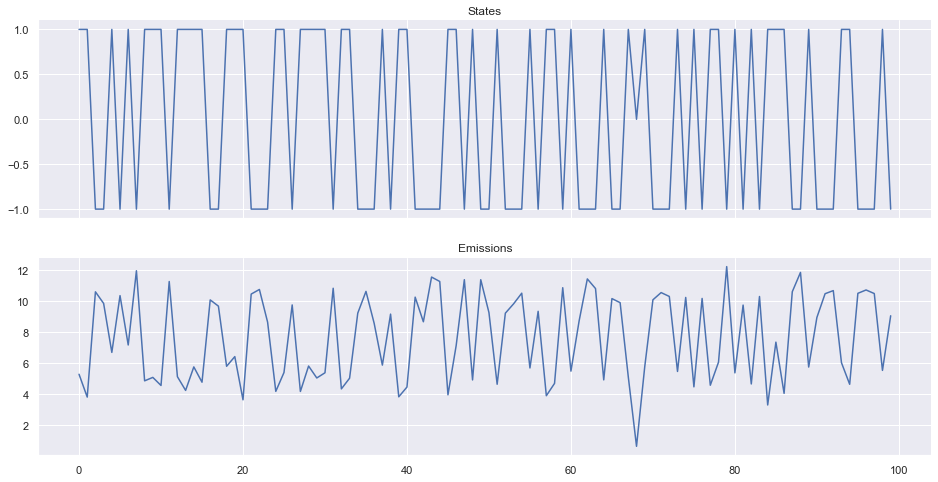

In [61]:
#Non-Autoregressive Homoskedastic Emissions have the mean mu depending only on the 
#hidden state at time t, and not on the previous hidden state or the previous emission value.
hom_ems = flt.gaussian_homoskedastic_emissions(states, mus=[0,5,-10, 0, 10])
flt.plot_emissions(states, hom_ems)

# 1.6 Analysis of Macro Series (Trend and Stationarity)

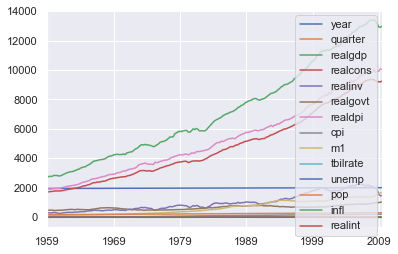

In [62]:
import statsmodels.api as sm

dta = sm.datasets.macrodata.load_pandas().data
index = pd.period_range('1959Q1', '2009Q3', freq='Q')
dta.set_index(index, inplace=True)
dta.plot()
    

### Trend

1959Q1    3.902943
1959Q2    3.902943
1959Q3    3.902943
1959Q4    3.902943
1960Q1    3.902943
Freq: Q-DEC, Name: trend, dtype: float64

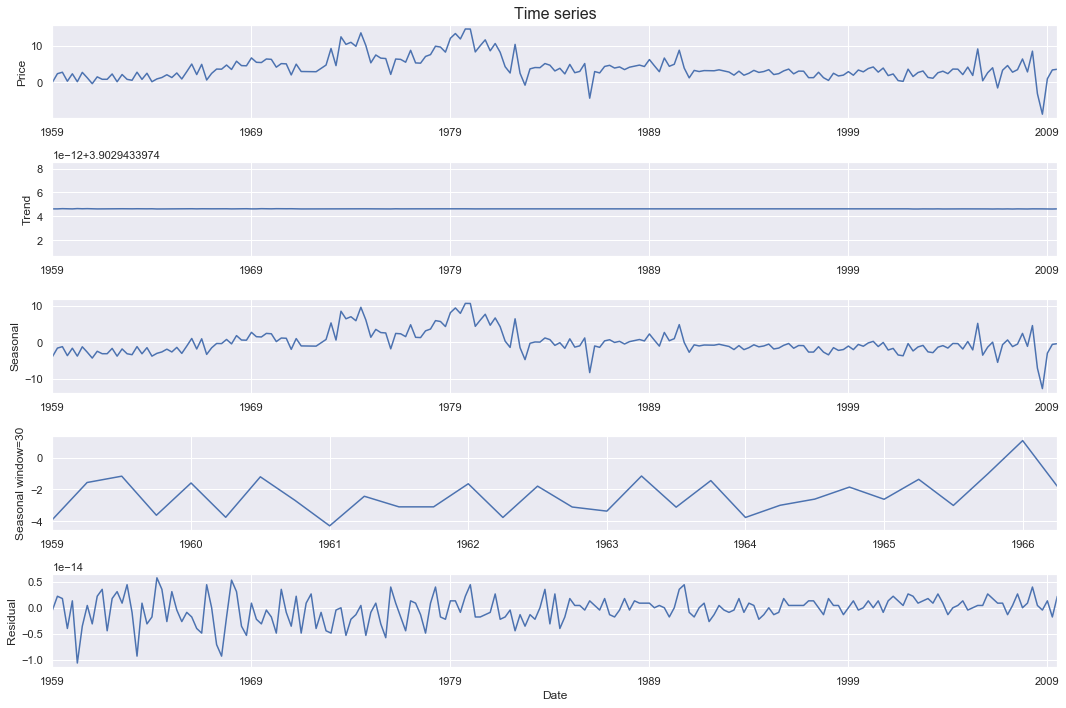

In [63]:
decomp=flt.STLSeriesDecomp(dta,'infl',plot=True)
decomp['STL_trend'].head(5)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/pandas/core/indexes/range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


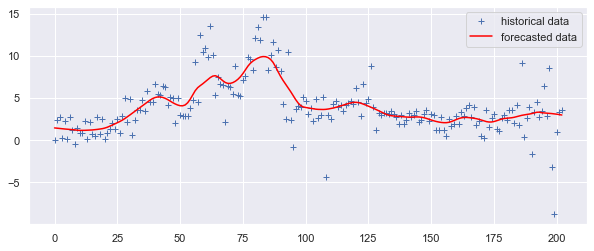

In [64]:
x=(dta.reset_index()).index
y=dta.infl
x_,yhat = flt.lowess(x,y)
flt.plotSmoother(x,y,yhat)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/pandas/core/indexes/range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


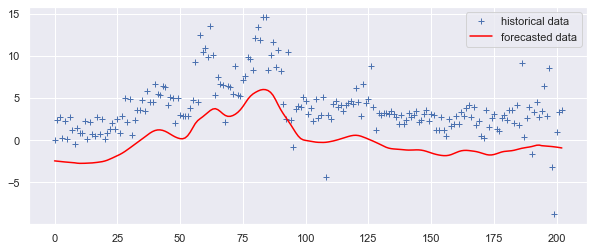

In [65]:
x_,yhat = flt.lowess(x,decomp['STL_cycle'])
flt.plotSmoother(x,y,yhat)

1959Q1    1.206811
1959Q2    1.198501
1959Q3    1.189436
1959Q4    1.179577
1960Q1    1.169851
Freq: Q-DEC, Name: infl_trend, dtype: float64

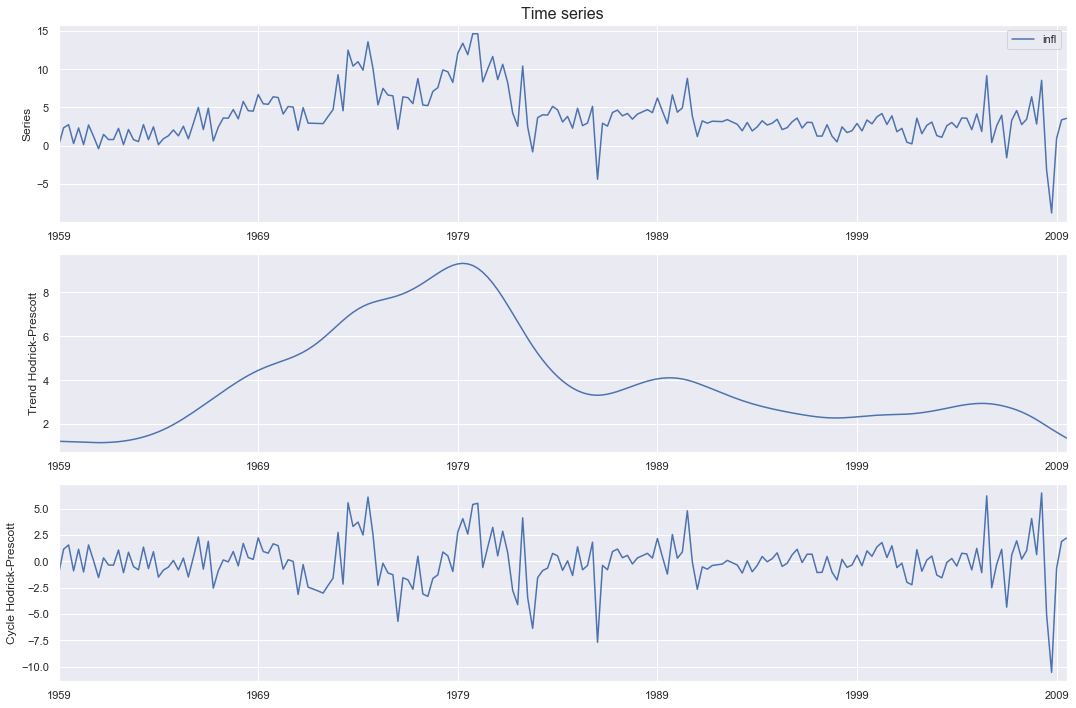

In [66]:
decomp=flt.HodrickPrescottSeriesDecomp(dta,'infl',plot=True)
decomp['HP_trend'].head(5)


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/pandas/core/indexes/range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


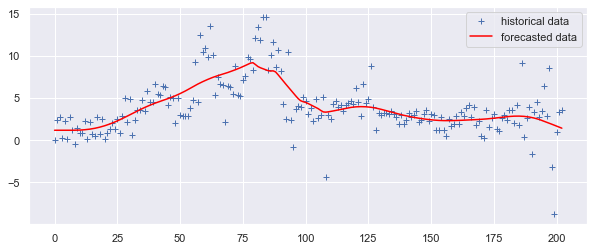

In [67]:
x_,yhat = flt.lowess(x,decomp['HP_trend'])
flt.plotSmoother(x,y,yhat)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/pandas/core/indexes/range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


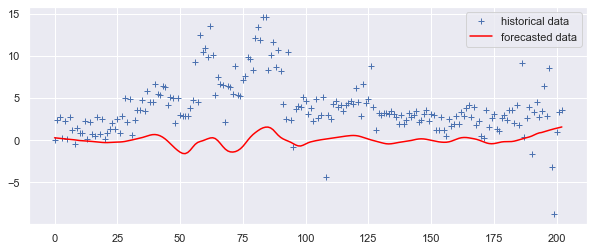

In [68]:
x_,yhat = flt.lowess(x,decomp['HP_cycle'])
flt.plotSmoother(x,y,yhat)

1959Q1   -0.237927
1959Q2    1.552369
1959Q3    1.527017
1959Q4   -1.039625
1960Q1    1.267377
Freq: Q-DEC, Name: trend, dtype: float64

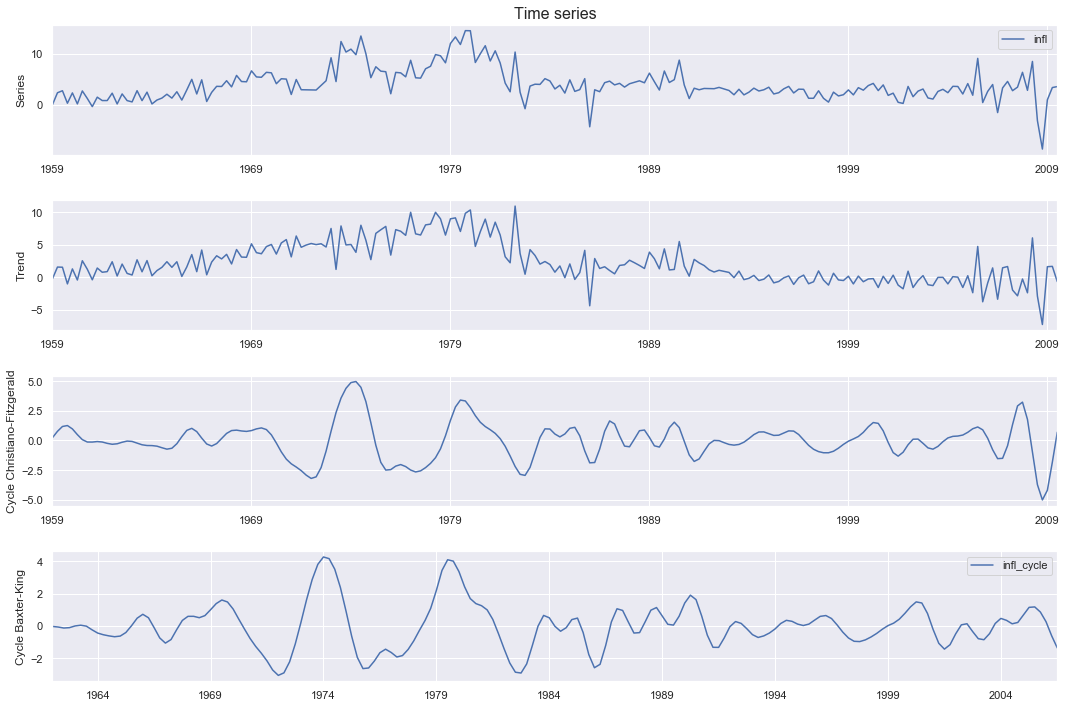

In [69]:
decomp=flt.CFBKSeriesDecomp(dta,'infl',plot=True)
decomp['CF_trend'].head(5)


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/pandas/core/indexes/range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


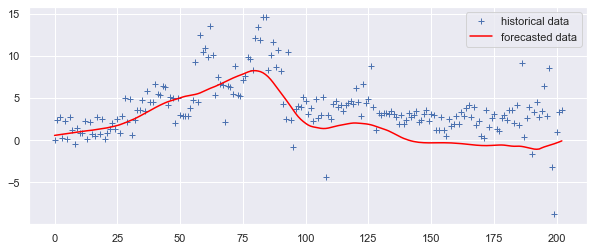

In [70]:
x_,yhat = flt.lowess(x,decomp['CF_trend'])
flt.plotSmoother(x,y,yhat)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/pandas/core/indexes/range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


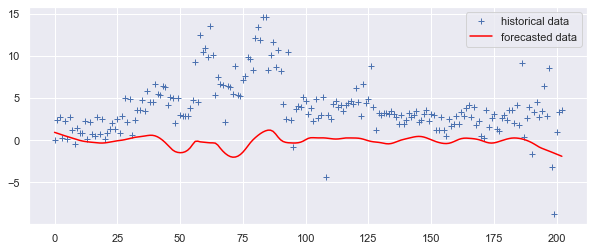

In [71]:
x_,yhat = flt.lowess(x,decomp['CF_cycle'])
flt.plotSmoother(x,y,yhat)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/pandas/core/indexes/range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


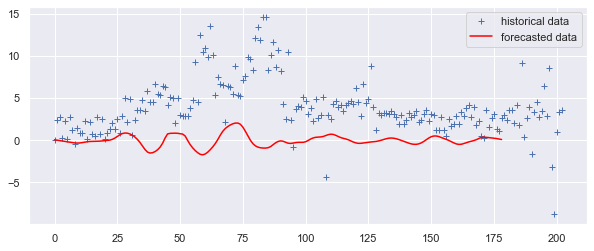

In [72]:
x_,yhat = flt.lowess(x,decomp['BK_cycle'])
flt.plotSmoother(x,y,yhat)


### Stationarity

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


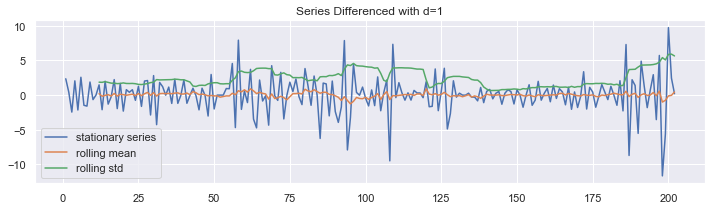

ACF First Lag AR(q):  1


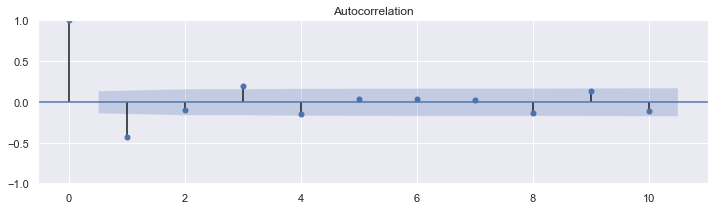

PACF First Lag MA(p):  1


/Users/rob/.local/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


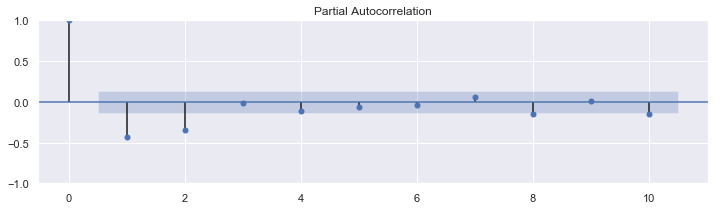

-------------------- Unit Root Tests -----------------------------
Results of Dickey-Fuller Test:
Test Statistic                -1.715566e+01
p-value                        6.895349e-30
#Lags Used                     1.000000e+00
Number of Observations Used    2.000000e+02
Critical Value (1%)           -3.463476e+00
Critical Value (5%)           -2.876102e+00
Critical Value (10%)          -2.574532e+00
dtype: float64
The series is stationary

Results of KPSS Test:
Test Statistic           0.03196
p-value                  0.10000
Lags Used                2.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64
The series is stationary
------------------------------------------------------------------


/Users/rob/.local/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [73]:
diff_series,p,q=flt.seriesDifferencing(dta,tlog=False,lbl='infl',diff=1,cin=0.05)
